# Recap from Lecture 2

let's star printing a variable "print(a)"

In [24]:
print(a)

hello


**<font color='blue'>question:</font>** why we got an error? let's try again after we figured out the issue

In [25]:
a='hello'
print(a)

hello


remember you need always to run the cell where you have the define something before using the definition. this is also true when you import a package or define a function, a variable an array a list ecc

### Matplotlib and magic functions

In [26]:
# pylab is a nice interface to all that is matplotlib
import matplotlib.pyplot as plt
import numpy as np

# plots to appear in the notebook:
%matplotlib inline

### Basic plotting

**<font color='blue'>Exercise:</font>** Try to plot y vs. x and add labels to x-axis and y-axis

In [27]:
x = np.linspace(0, 2*np.pi, 20)
y = np.sin(x)

Text(0.5, 0, 'x')

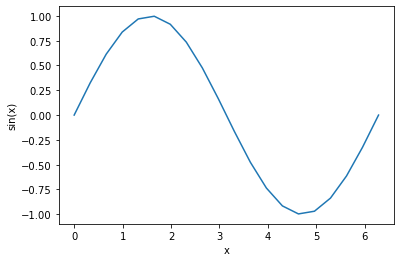

In [28]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.xlabel('x')

### Plotting Styles

Line Plots

<code> '-'             solid line style
 '--'            dashed line style
 '-.'            dash-dot line style
 ':'             dotted line style
 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'</code>

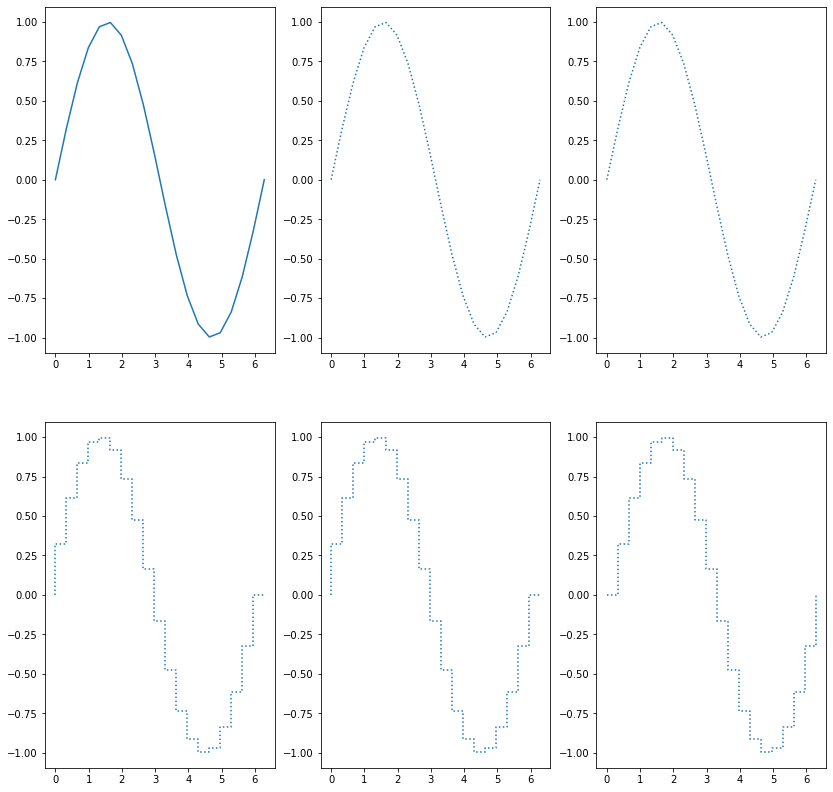

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14, 14))
# plt.plot?
ax[0, 0].plot(x, y)
ax[0, 1].plot(x, y, ':')
ax[0, 2].plot(x, y, linestyle=':')
ax[1, 0].plot(x, y, linestyle=':', drawstyle ='steps')
ax[1, 1].plot(x, y, linestyle=':', drawstyle ='steps-pre')
ax[1, 2].plot(x, y, linestyle=':', drawstyle ='steps-post')

### Other plotting styles

#### Scatter
Plots the points without connecting them.

<code>``'.'``             point marker
 ``','``             pixel marker
 ``'o'``             circle marker
 ``'*'``             star marker
 ``'x'``             x marker
 ``'D'``             diamond marker
 ``'d'``             thin_diamond marker
</code>

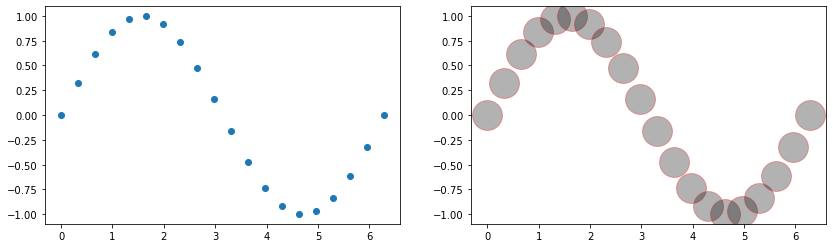

In [30]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
ax[0].plot(x, y, 'o')
ax[1].plot(x, y, 'o', ms=30, mec='red', color='black', alpha=0.3) #ms: markersize; mec: markeredgecolor

**<font color='blue'>Exercise:</font>** make a plot with your favorite style and color

Text(0, 0.5, 'sin(x)')

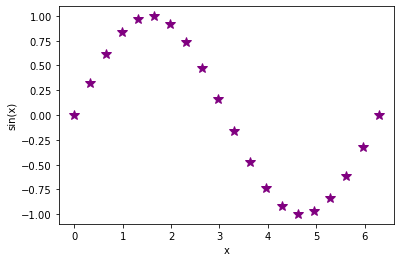

In [31]:
plt.plot(x, y, '*', color='purple', ms=10)
plt.xlabel('x')
plt.ylabel('sin(x)')

### Error bars
Can plot the error of each individual point in both x and y direction

<ErrorbarContainer object of 3 artists>

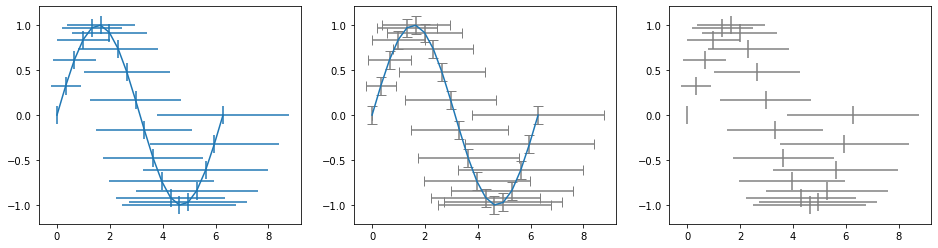

In [32]:
xerr = np.sqrt(x)
yerr = 0.1

fig, ax = plt.subplots(ncols=3, figsize=(16, 4))

ax[0].errorbar(x, y, xerr=xerr, yerr=yerr)
# add error caps, color the error bars differently than the data:
ax[1].errorbar(x, y, xerr=xerr, yerr=yerr, capsize=5, ecolor='gray')
# don't plot values? Just error bars? set fmt='none'
ax[2].errorbar(x, y, xerr=xerr, yerr=yerr, capsize=0, ecolor='gray', fmt='none')

### Histogram
let's now define a varialbe with random values (we will use the function x = np.random.normal(size=???) where instead of ??? you need the number of random values you want.
let's also define a second variable that is just the counts of all these measuremts we have 
y = np.arange(0, len(x)). <br>
**<font color='blue'>Exercise:</font>** let's take a look how these variable looks like plotting y and x

100
100


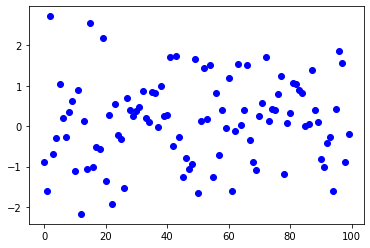

In [33]:
#Example: 
x = np.random.normal(size=100)
y = np.arange(0, len(x))
print(len(x))
print(len(y))
fig, ax = plt.subplots()
ax.plot(y,x,'ob')

### Histogram
plotting the mesurments we have in this way is not usually very usfull. Sometime is better to use histograms to see how all the measurments distribute. <br>
Define a series of bins and count how many points are in each bin

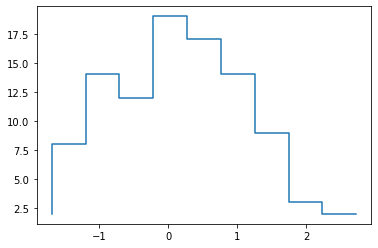

In [34]:
fig, ax = plt.subplots()
h, bins = np.histogram(x, bins=10)
ax.plot(bins[1:], h,  linestyle='-', drawstyle ='steps-pre')
plt.draw()

A more convenient function: **plt.hist**

Difference between *np.histogram* and *plt.hist*:

*np.histogram* just calculates the counts. *plt.hist* can calculate and plot them

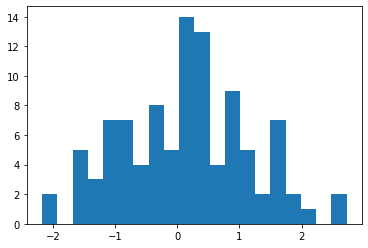

In [35]:
hist = plt.hist(x, bins=20)

# how to plot an astronomical image and how to detect object in the image

<br> Let's import the packeages we will use today: **[sep](https://sep.readthedocs.io/en/v1.1.x/)**, **[astropy](https://docs.astropy.org/en/stable/index.html)**  
<br> from **astropy** we will import: **fits** and **wcs**

In [36]:
from astropy.io import fits
from astropy import wcs as wcs
import sep

# read an image
**16335757.fits** is our test image. we will use fits.open to open and put the image in a variable hdu
<br> let's see the image format. Fits mean "Flexible Image Transport System" 
<br> this is a specific format composed by a metadata part and a data part.
The metadata (**header**) include all the info about the image and the data part is usually a bidimensional array. A fits image can have multiple layers of metadata and data, and each layer is called a **header and data unit (HDU)**.
<br> For example:<br>
<br> header, data  (level[0])
<br> header, data  (level[1])
<br> header, data  (level[2])

In [37]:
hdu_list = fits.open('16335757.fits')

<br> You can see how many layers your image has using the function len()

**<font color='blue'>Check how many layers the image has:</font>**

In [38]:
len(hdu_list)

1

Since the size is one, let's take a look at the layer zero. Each fits file has several important informations in what is called the header of the file. In the header you can find information like: the exposure time, the telescope, the data of the observations, the size of the data, the observer and sometimes also the informations of the part of the sky we observed 

In [39]:
header = hdu_list[0].header
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1024 / length of data axis 1                          
NAXIS2  =                 1024 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE-OBS= '2016-04-30T01:18:07' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   60.000000000000000 /Exposure time in seconds                        
EXPOSURE=   60.000000000000000 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -20.1702352500000

Now let see the data

In [40]:
img = hdu_list[0].data
print(img)

[[227.64964 242.42308 254.67735 ... 260.97653 234.49554 257.19666]
 [222.01602 265.02048 248.61688 ... 249.39539 249.02998 263.34747]
 [242.40106 235.84102 219.14624 ... 260.77954 227.6311  245.4189 ]
 ...
 [258.41376 235.47336 252.11043 ... 254.78888 252.02977 224.48628]
 [253.63196 250.44969 258.99002 ... 264.21622 246.82892 265.422  ]
 [243.02887 276.27774 218.37288 ... 207.54837 259.7037  248.36153]]


The data is an array, so we can actually use matplotlib to "imshow" the image

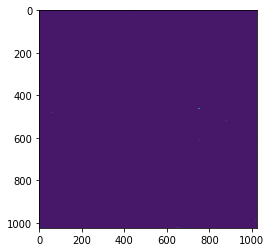

In [15]:
plt.imshow(img)

What is going on here? We do not see anything. Probably becasue there are some pixel in the array that have very low or very high counts.
So we can do an histogram and see the distribution of the points in the array 

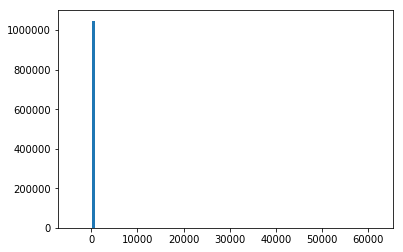

In [16]:
image_hist = plt.hist(img.flatten(), bins=100)

**<font color='blue'>Exercise: </font>**let's try to constrain the range of the histogram using range=(min_value, max_value). You can try different ranges until you find a range that can properly display the value distribution.

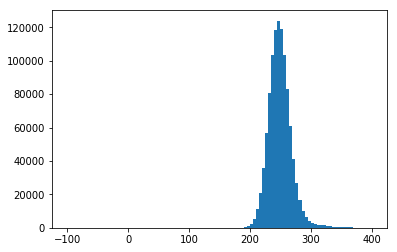

In [17]:
min_value = -100
max_value = 400
image_hist = plt.hist(img.flatten(), bins=100, range=(min_value, max_value))

let's now do the plot again using some limits. 
For **imshow**, we can use the keywords **vmin** and **vmax** to set limits on the color scaling.

what do yo think we should use?  (vmin=??, vmax=??)

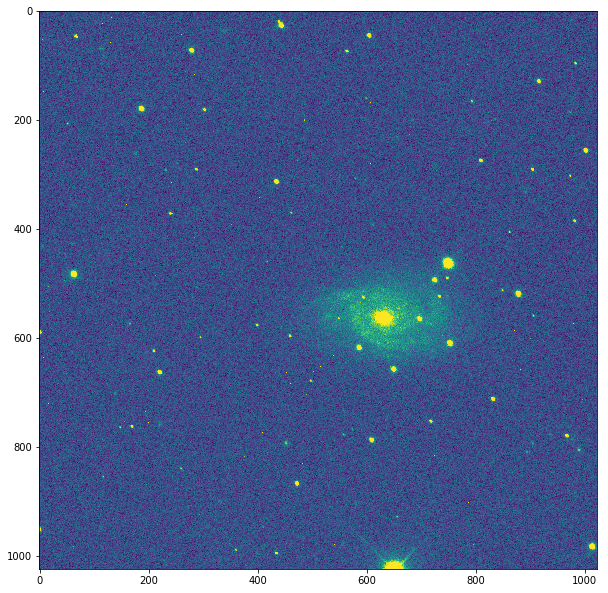

In [18]:
plt.figure(figsize=(10,12))
imgshow = plt.imshow(img, vmin=200, vmax=400)

We can choose another color map for display purpose (see more colormpas here: [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html))

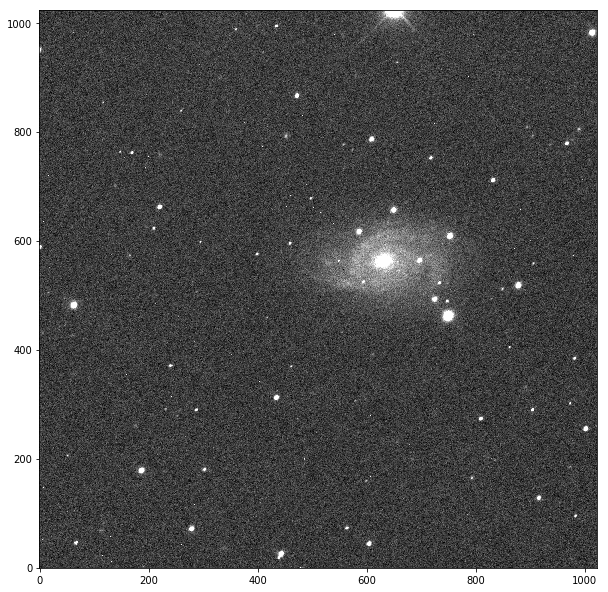

In [19]:
plt.figure(figsize=(10,12))
imgshow = plt.imshow(img, cmap='gray', origin='lower', vmin=200, vmax=400)

Now we would like to be able to find the position of all stars in the image. But in order to do that with the package [sep](https://sep.readthedocs.io/en/v1.1.x/), we need to define the background of the image. Sep has a command for that: sep.Background(X). 
But before doing that there is a command to run: X = X.byteswap().newbyteorder()

In [20]:
img = img.byteswap().newbyteorder() # magic command
bkg = sep.Background(img)

Let's see what will happen if we subtract the background from the image

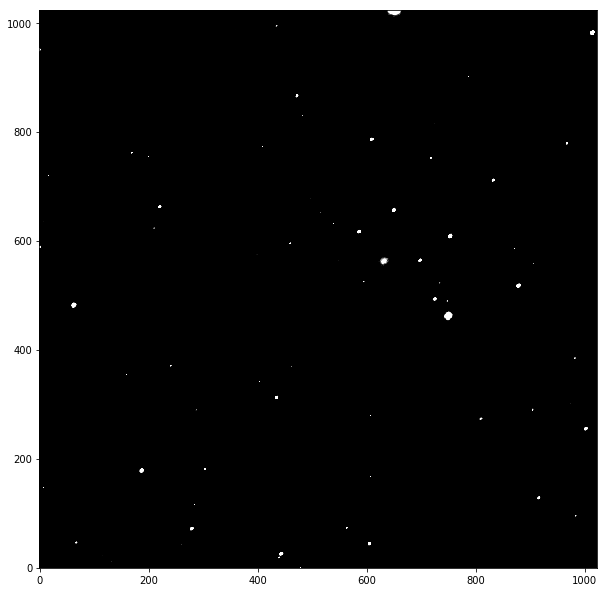

In [21]:
bkg_image = bkg.back()
img_sub = img - bkg
plt.figure(figsize=(10,12))
imgshow = plt.imshow(img_sub, cmap='gray', origin='lower', vmin=200, vmax=400)

Now we can extract all the objects from the image using the sep commmand sep.extract
and then we can plot all the star detected on our image.  thresh=20.0 define how many star we want to find. larger numbers means we find less objects. This is similar to a dictionary with each column that can be identified by a name. 

In [22]:
#objects = sep.extract(X, thresh=20.0, err=bkg.globalrms, mask=None, minarea=10, clean=True, clean_param=1.0, segmentation_map=False)
objects = sep.extract(img, thresh=20.0, err=bkg.globalrms, minarea=10)

**<font color='blue'>Exercise: </font>** Check the length and data type of **objects**

In [23]:
print(len(objects))
print(type(objects))
objects.dtype.names

52
<class 'numpy.ndarray'>


('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

objects is a NumPy structured array with many fields.

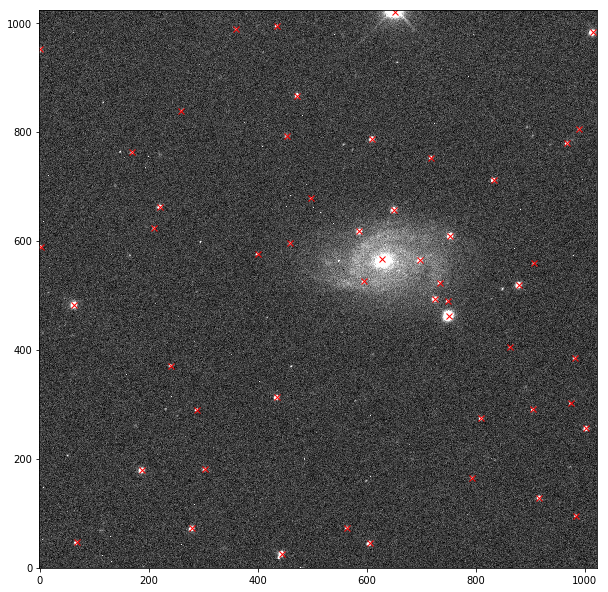

In [24]:
plt.figure(figsize=(10,12))
imgshow = plt.imshow(img, origin='lower', cmap='gray', vmin=200, vmax=400)
plt.plot(objects['x'],objects['y'],'xr')

### WCS

if we know the coordinate of one interesting object, how we find it in the image?
To do that we can use the information on the header of the file and convert the coordinate in pixel position. To do that we will use the [wcs](https://docs.astropy.org/en/stable/wcs/) package in astropy. 

In [25]:
#read the header
header = hdu_list[0].header
# import the wcs package
from astropy.wcs import WCS
# take information from the header about the coordinate where the image is pointing to.
w = WCS(header)
#transform coordinate in pixels:
Ra = 148.283666667
Dec = 16.7139583333
px, py = w.wcs_world2pix(Ra,Dec, 1)
print('my object should be close to these coordinate')
print(px,py)

my object should be close to these coordinate
611.6228472316652 786.023106657171


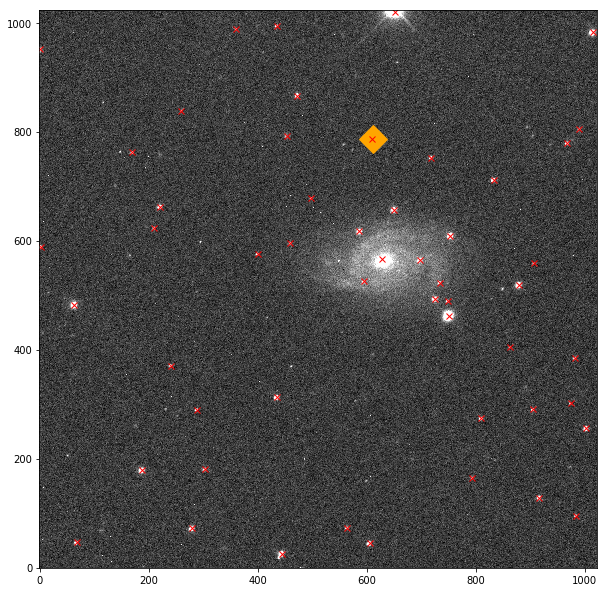

In [26]:
plt.figure(figsize=(10,12))
imgshow = plt.imshow(img, origin='lower', cmap='gray', vmin=200, vmax=400)
plt.plot(611,786,'D',color='orange',markersize=20)
plt.plot(objects['x'],objects['y'],'xr')

Now we want to identify in the object dictinary which is our object. We need to compare the pixel position for each object in the object dictionary with the pixel position we found. we need to measure the distance between them and take the object if the distance is less than XX pixels.
let's loop over the stars using enumerate and compute the difference between the coordinates

**enumerate** can give you a counting variable. It allows us to loop over something and have an automatic counter

In [27]:
values = ['a', 'b', 'c']
for value in values:
    print(value)

a
b
c


In [28]:
for value in enumerate(values):
    print(value)

(0, 'a')
(1, 'b')
(2, 'c')


In [29]:
for count, value in enumerate(values):
    print(count, value)

0 a
1 b
2 c


In [30]:
for i,j in enumerate(objects['x']):
    distance = (objects['x'][i]-px)**2+(objects['y'][i]-py)**2
    print('distance ', distance)
    if distance < 10:
        print('FOUND', i)
        print('The coordinate is', objects['x'][i], objects['y'][i])
        break

distance  606218.811814135
distance  843527.8481868962
distance  549834.8819494349
distance  510388.84200081707
distance  620140.2866683039
distance  615860.7154908418
distance  525591.4491374915
distance  419055.846142043
distance  548470.5757165931
distance  461407.9747808731
distance  434973.82292945846
distance  302085.12784636
distance  350479.13981862355
distance  332034.50344298105
distance  366267.0371471671
distance  255099.38350877556
distance  309756.5272692411
distance  298688.838501308
distance  208617.4286756874
distance  124236.45702733232
distance  392790.9913583734
distance  106715.85927504052
distance  98876.73915315307
distance  143678.9370955655
distance  84317.87242682924
distance  68341.40762653315
distance  139082.9165115908
distance  56903.6944890372
distance  89034.62309039972
distance  410759.44156613335
distance  59178.64828294334
distance  48926.6882299012
distance  51684.124598782306
distance  29147.921814350702
distance  187660.15934479152
distance  18260.